<h1>Catalog</h1>
- Introduction <br>
- Data Set <br>
- EDA<br>
- Feature Engineering/Selectionv<br>
- Model & Result review<br>
- Interpetration<br>
- Conlcusion<br>


In [2]:
# we import the necessary libraries
import torch 
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.model_selection import cross_val_score



In [3]:
# Load the data:
raw_data = pd.read_csv('diabetes.csv')
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Data Cleaning:
# we check for missing values
missing_values = ["", "nan", "Null", "null"]
filtered_raw_data = raw_data.drop_duplicates()
filtered_raw_data = filtered_raw_data.replace(missing_values, numpy.nan)
filtered_raw_data = filtered_raw_data.dropna()
filtered_raw_data.shape 


(768, 9)

In [5]:
filtered_raw_data[filtered_raw_data == 0].drop("Outcome", axis=1).count()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [6]:
# use knn to impute the missing values in the diabetes dataset
# change all the 0 values in the columsn excepting pregenancies and Outcome to nan
filtered_raw_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = filtered_raw_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, numpy.nan)
filtered_raw_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h1>EDA Process</h1>

<p>We will need to present different form of EDA according to the different missing values handling methods</p>

<Axes: xlabel='Outcome', ylabel='count'>

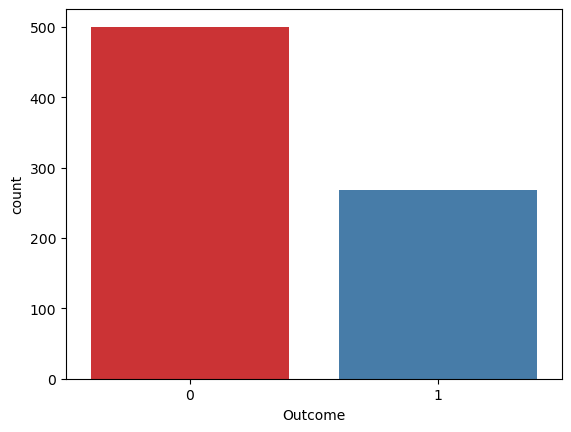

In [43]:
sns.countplot(x='Outcome', hue="Outcome", data=raw_data, palette="Set1", legend=False)


<p>Here, 0 represent the people who do not have diabetes in the raw data, and 1 represents people who have diabetes. It can derived from this that the dataset has a mild case of unbalance.</p>

<h2>Knn Impute Method</h2>

In [ ]:
imputer = KNNImputer(n_neighbors=5)
knn_imputed = pd.DataFrame(imputer.fit_transform(filtered_raw_data), columns=filtered_raw_data.columns)
knn_imputed

In [ ]:
knn_imputed.describe()


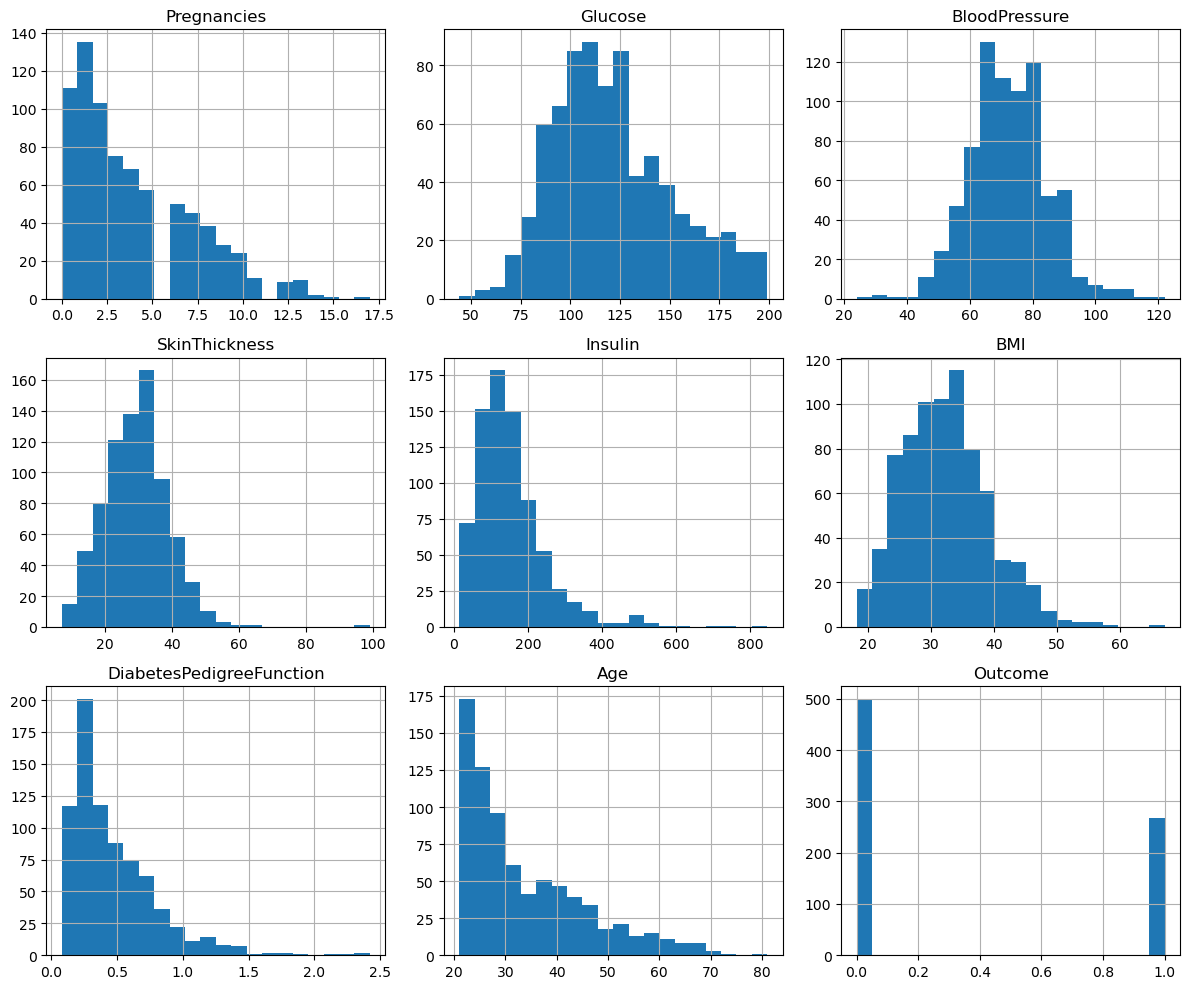

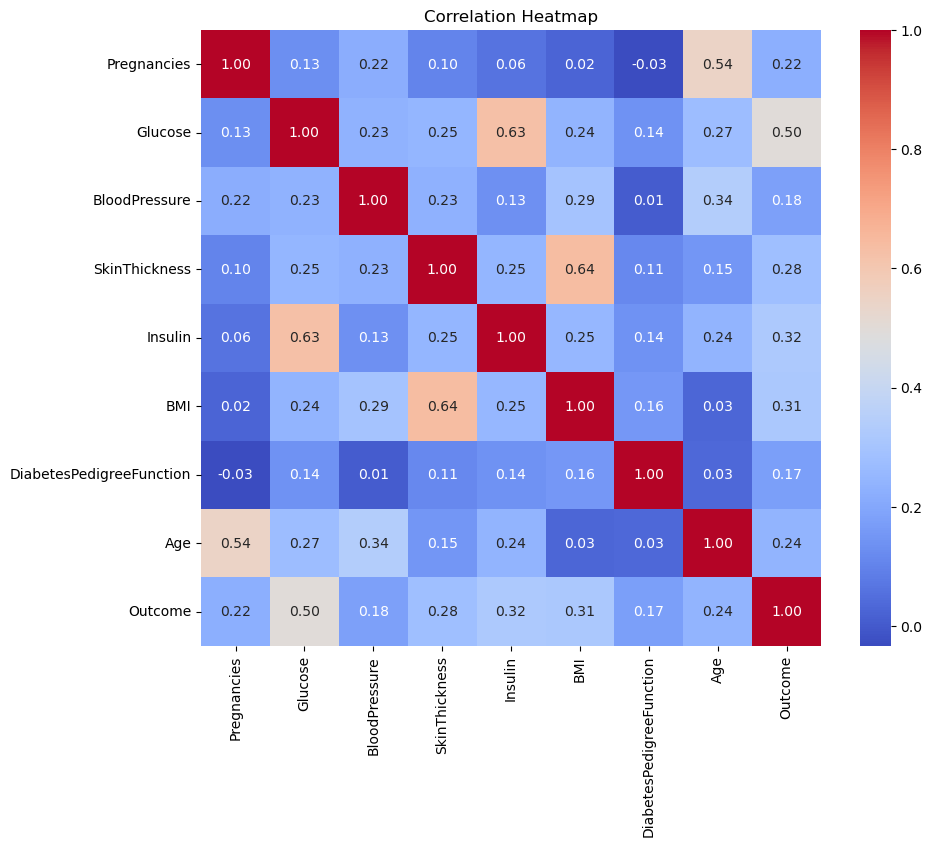

In [9]:
# Histograms for numerical columns
knn_imputed.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(knn_imputed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

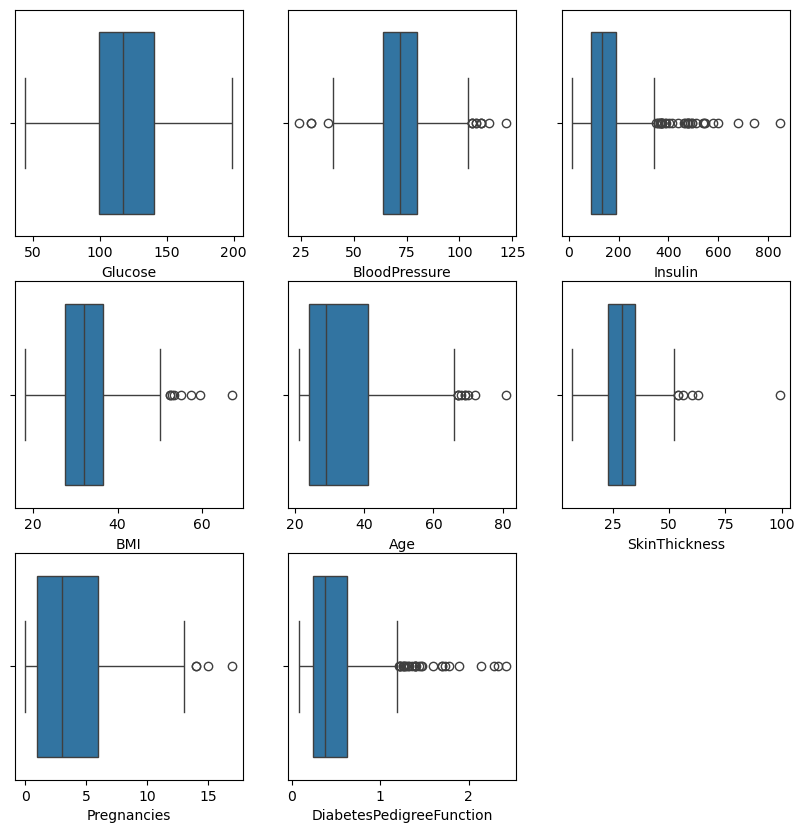

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=knn_imputed)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=knn_imputed)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=knn_imputed)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=knn_imputed)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=knn_imputed)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=knn_imputed)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=knn_imputed)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=knn_imputed)

<h2>Mix use of Median and Mean</h2>

In [47]:
meanMax_imputed = filtered_raw_data.copy()

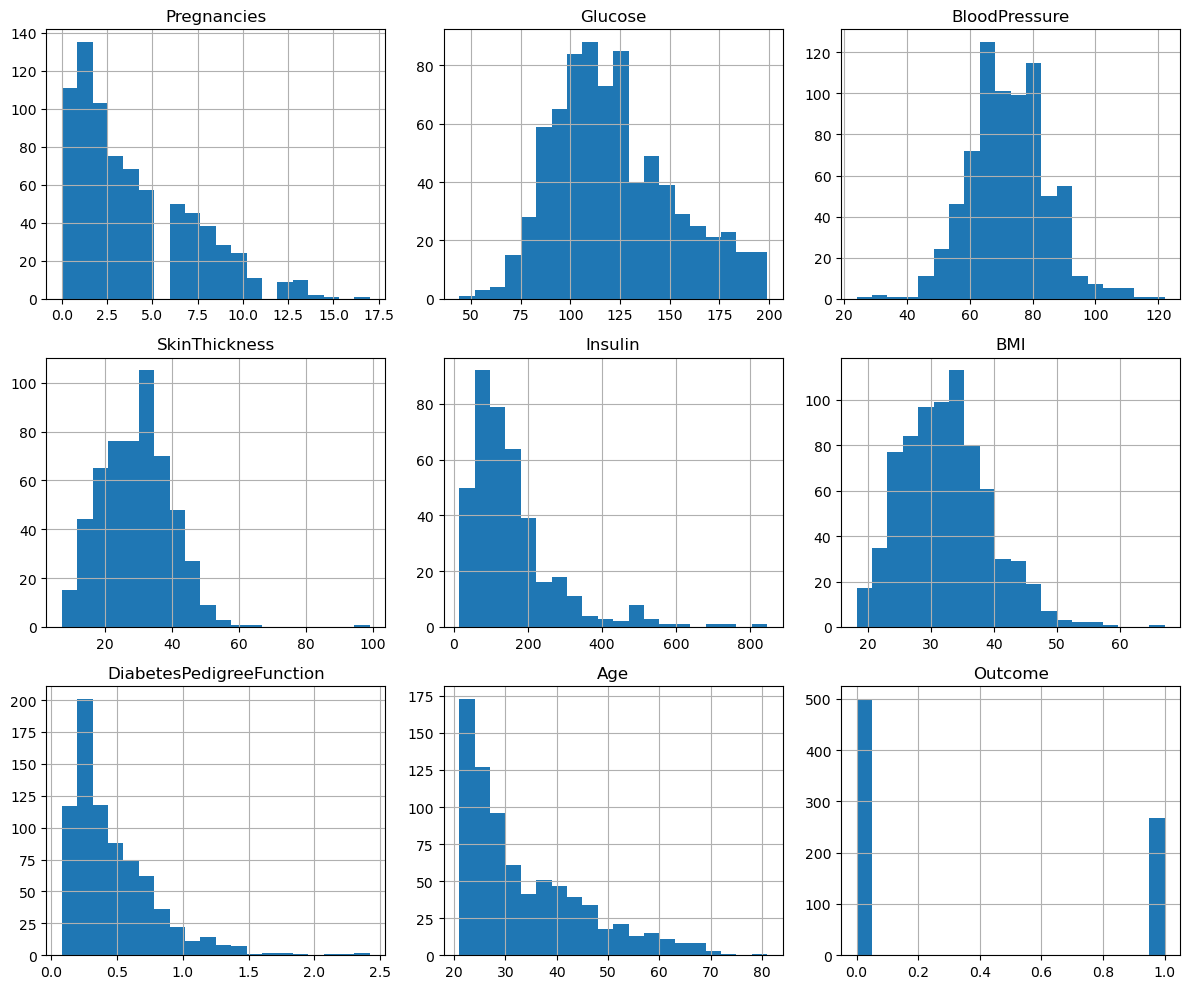

<Figure size 1000x800 with 0 Axes>

In [48]:
# Histograms for numerical columns
meanMax_imputed.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
# sns.heatmap(meanMax_imputed.corr(), annot=True, fmt=".2f")
# plt.title("Correlation Heatmap")
plt.show()

In [49]:
# Imputing NaN values in features(columns) according their distribution
meanMax_imputed['Glucose'].fillna(meanMax_imputed['Glucose'].mean(), inplace=True)
meanMax_imputed['BloodPressure'].fillna(meanMax_imputed['BloodPressure'].mean(), inplace=True)
meanMax_imputed['SkinThickness'].fillna(meanMax_imputed['SkinThickness'].median(), inplace=True)
meanMax_imputed['BMI'].fillna(meanMax_imputed['BMI'].median(), inplace=True)
meanMax_imputed['Insulin'].fillna(meanMax_imputed['Insulin'].median(), inplace=True)

C:\Users\pierr\AppData\Local\Temp\ipykernel_17552\349887070.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  meanMax_imputed['Glucose'].fillna(meanMax_imputed['Glucose'].mean(), inplace=True)
C:\Users\pierr\AppData\Local\Temp\ipykernel_17552\349887070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

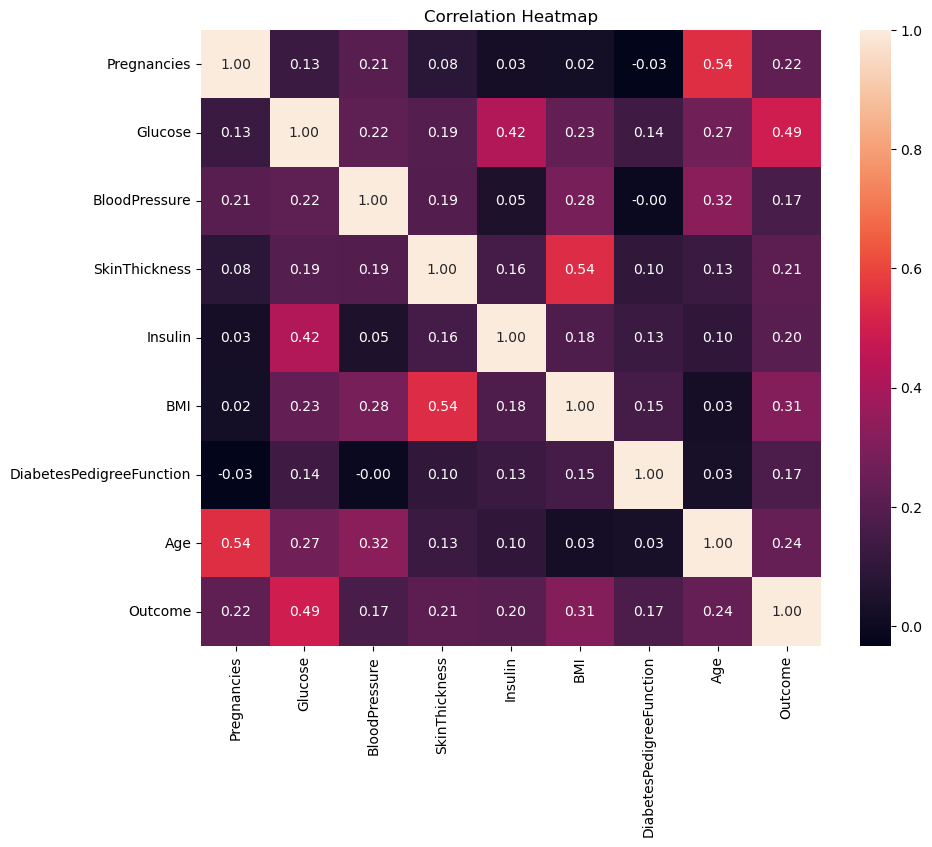

In [50]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(meanMax_imputed.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

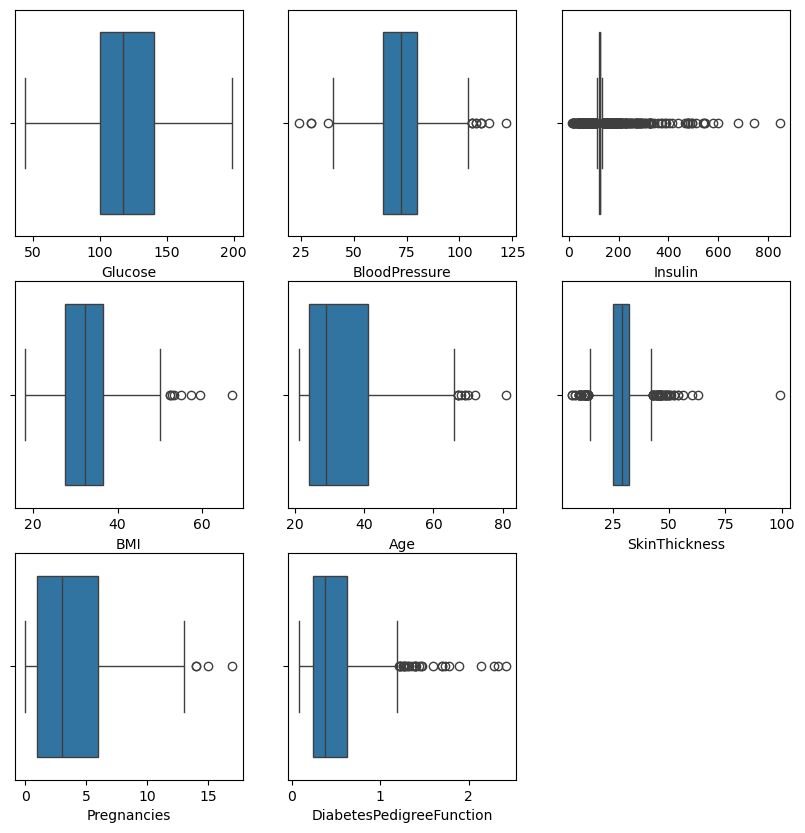

In [51]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=meanMax_imputed)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=meanMax_imputed)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=meanMax_imputed)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=meanMax_imputed)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=meanMax_imputed)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=meanMax_imputed)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=meanMax_imputed)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=meanMax_imputed)

In [14]:
meanMax_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h3>Another method to handle missing values</h3>

In [15]:
meanMax_imputed_2 = filtered_raw_data.copy()

In [17]:
# Changing 0 values with NaN
meanMax_imputed_2[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']] = meanMax_imputed_2[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']].replace(0, numpy.NaN)
meanMax_imputed_2.isnull().sum()



Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
def median_target(column):   
    temp = meanMax_imputed_2[meanMax_imputed_2[column].notnull()]
    temp = temp[[column, 'Outcome']].groupby(['Outcome'])[[column]].median().reset_index()
    return temp

In [19]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [20]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['Insulin'].isnull()), 'Insulin'] = 102.5
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['Insulin'].isnull()), 'Insulin'] = 169.5



In [21]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [22]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['Glucose'].isnull()), 'Glucose'] = 107
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['Glucose'].isnull()), 'Glucose'] = 140

In [23]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [24]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['SkinThickness'].isnull()), 'SkinThickness'] = 27
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['SkinThickness'].isnull()), 'SkinThickness'] = 32


In [25]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [26]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['BloodPressure'].isnull()), 'BloodPressure'] = 70
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [27]:
median_target('BMI')


,Outcome,BMI
0,0,30.1
1,1,34.3


In [28]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['BMI'].isnull()), 'BMI'] = 30.1
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['BMI'].isnull()), 'BMI'] = 34.3

In [29]:
meanMax_imputed_2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

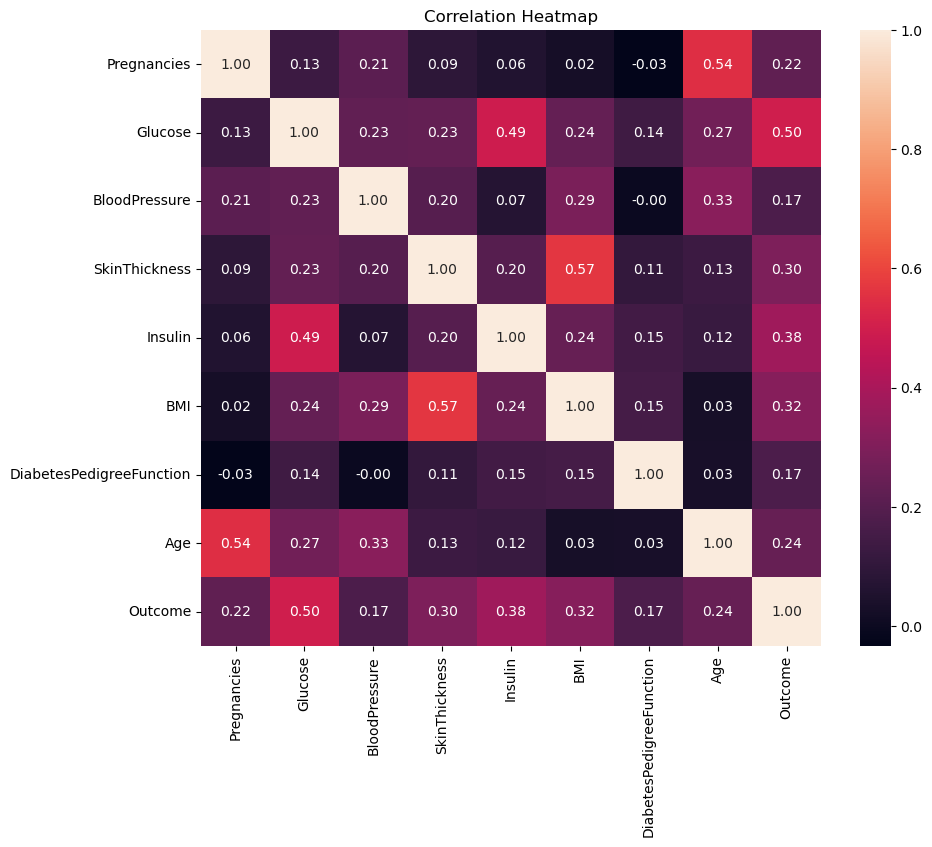

In [52]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(meanMax_imputed_2.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

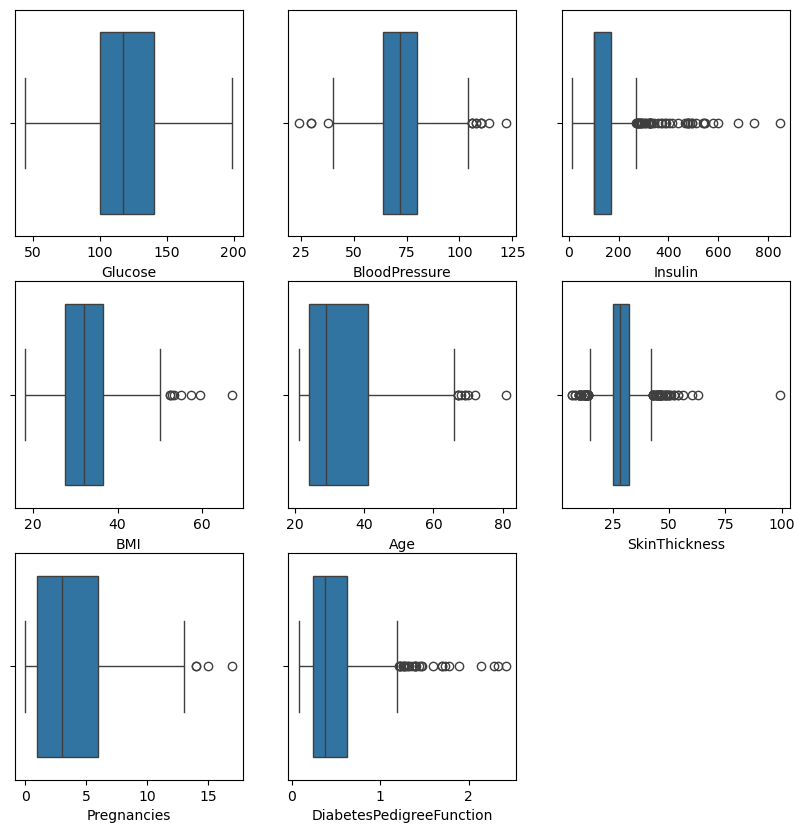

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=meanMax_imputed_2)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=meanMax_imputed_2)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=meanMax_imputed_2)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=meanMax_imputed_2)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=meanMax_imputed_2)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=meanMax_imputed_2)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=meanMax_imputed_2)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=meanMax_imputed_2)

In [54]:
meanMax_imputed_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<h2>Model Training</h2>

<h3>Random Forest</h3>

<h4>>>KNN</h4>

In [31]:
# Split the data into features and target
X = knn_imputed.drop('Outcome', axis=1)
y = knn_imputed['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(scores)

print(scores.mean())

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80        99
         1.0       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

[0.62962963 0.55555556 0.57407407 0.62264151 0.52830189]
0.5820405310971348


<h4>>>Mean Median</h4>




In [55]:
# Split the data into features and target
X = meanMax_imputed.drop('Outcome', axis=1)
y = meanMax_imputed['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(scores)

print(scores.mean())

Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

[0.62962963 0.62962963 0.46296296 0.67924528 0.52830189]
0.5859538784067085


<h4>>>Other</h4>

In [56]:
# Split the data into features and target
X = meanMax_imputed_2.drop('Outcome', axis=1)
y = meanMax_imputed_2['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(scores)

print(scores.mean())

Accuracy: 0.8831168831168831
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        99
           1       0.81      0.87      0.84        55

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.88      0.88       154

[0.77777778 0.7962963  0.75925926 0.83018868 0.83018868]
0.7987421383647797


<h3>SVM</h3>

In [32]:
# We use SVM to classify the diabetes dataset

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Train the model
X = knn_imputed.drop('Outcome', axis=1)
y = knn_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82        99
         1.0       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



<h3>Gradient Boosting</h3>

In [33]:
# We use Gradient Boosting to classify the diabetes dataset

from sklearn.ensemble import GradientBoostingClassifier

# Train the model
X = knn_imputed.drop('Outcome', axis=1)
y = knn_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(scores)


Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79        99
         1.0       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

[0.61111111 0.64814815 0.55555556 0.67924528 0.54716981]


<h3>Linear Regression</h3>

In [34]:
# We use linear regression to classify the diabetes dataset

from sklearn.linear_model import LogisticRegression

# Train the model
X = knn_imputed.drop('Outcome', axis=1)
y = knn_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

scores = cross_val_score(model, X, y, cv=5, scoring='recall')

print(scores)



Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        99
         1.0       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

[0.53703704 0.61111111 0.53703704 0.62264151 0.50943396]


c:\Users\pierr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pierr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_